# Import libraries 

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset 

In [21]:
dt = pd.read_csv("Reviews.csv")  
print(dt.shape)

(568454, 10)


# Print first few rows and column names

In [22]:
print(dt.head())
print("\nColumn names:", dt.columns.tolist())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

# Quick EDA 

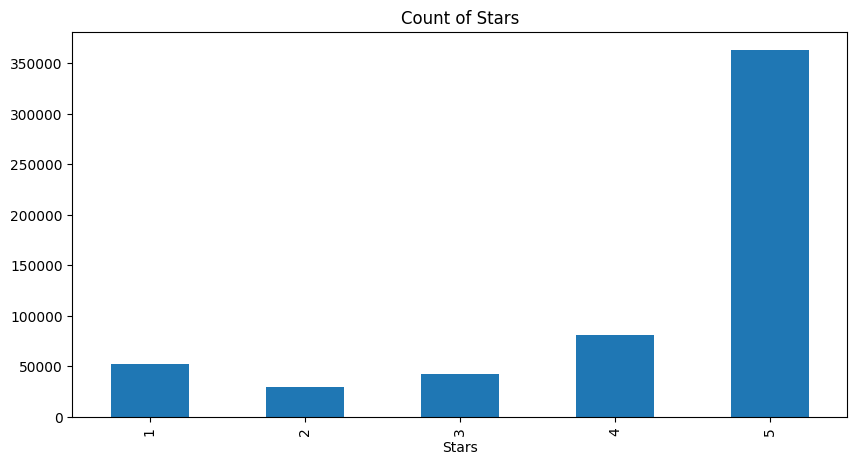

In [23]:
eda = dt['Score'].value_counts().sort_index().plot(
    kind='bar',
    title='Count of Stars',
    figsize=(10, 5)
)

eda.set_xlabel('Stars')
plt.show()

# Keep only necessary columns (drop missing values and duplicates)

In [24]:
dt = dt[['Text', 'Score']]
dt.dropna(inplace=True)
dt.drop_duplicates(inplace=True)

print(dt.head())

                                                Text  Score
0  I have bought several of the Vitality canned d...      5
1  Product arrived labeled as Jumbo Salted Peanut...      1
2  This is a confection that has been around a fe...      4
3  If you are looking for the secret ingredient i...      2
4  Great taffy at a great price.  There was a wid...      5


# Convert score to sentiment (Positive, Negative, and Neutral)

In [25]:
dt['Sentiment'] = dt['Score'].apply(lambda x: 2 if x >= 4 else (1 if x == 3 else 0))

- #### 2 = Positive (score 4 and 5)
- #### 1 = Neutral (score 3)
- #### 0 = Negative (score 1 and 2)

# Check the distribution of sentiment labels

In [26]:
print(dt['Sentiment'].value_counts())

Sentiment
2    306819
0     57084
1     29772
Name: count, dtype: int64


# Download NLTK resources

In [27]:
nltk.download('all')  

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[

True

# Initialize lemmatizer and stopwords

In [28]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Data preprocessing steps (lowercase, tokenization, remove punctuation and stopwords)

In [29]:
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]
    return " ".join(tokens)

dt['Cleaned_Text'] = dt['Text'].apply(preprocess_text)
print(dt[['Text', 'Cleaned_Text']].head())

                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                        Cleaned_Text  
0  bought several vitality canned dog food produc...  
1  product arrived labeled jumbo salted peanut .....  
2  confection around century light pillowy citrus...  
3  looking secret ingredient robitussin believe f...  
4  great taffy great price wide assortment yummy ...  


# Convert text into numerical features (TF-IDF)

In [39]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dt['Cleaned_Text'])
y = dt['Sentiment']

print(X.shape, y.shape)

(393675, 114840) (393675,)


# Split data into 80%- training and 20%- testing sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(314940, 114840) (78735, 114840)


# Train Logistic Regression model

In [41]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

# Evaluate model performance

### Predict on test data

In [33]:
y_pred = model.predict(X_test)

### Accuracy

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


### Classification report

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69     11286
           1       0.46      0.15      0.23      5885
           2       0.90      0.97      0.93     61564

    accuracy                           0.86     78735
   macro avg       0.69      0.59      0.62     78735
weighted avg       0.84      0.86      0.84     78735



# Test with new data

In [36]:
def predict_sentiment(review):
    review = preprocess_text(review)  
    review_tfidf = vectorizer.transform([review])  
    prediction = model.predict(review_tfidf)[0]  
    
    if prediction == 2:
        return "Positive"
    elif prediction == 1:
        return "Neutral"
    else:
        return "Negative"

# Examples
print(predict_sentiment("This product is amazing!"))  
print(predict_sentiment("I guess it's okay, nothing special."))  
print(predict_sentiment("Worst experience, waste of money:(")) 

Positive
Neutral
Negative


# Save the model and vectorizer

In [42]:
import joblib

joblib.dump(model, "sentiment_model.pkl") 
joblib.dump(vectorizer, "vectorizer.pkl")  

['vectorizer.pkl']